# 2.3 & 3.3

In [1]:
# Function that creates a subgraph starting from a list of heroes

import itertools
import networkx as nx

def get_subgraph_with(graph: nx.Graph, heroes: iter):

    """Gets a subgraph of the given graph with the heroes and their neighbours.
    :arg
    graph (nx.Graph) - a networkx graph consisting of heroes that are connected to comics.
    heroes (iter) - an iterable of heroes that should be included in the subgraph.
    :return
    a networkx graph that is a subgraph of the given graph with all the provided heroes and the comics they appear in.
    """
    
    comics = list(itertools.chain(*set(graph.neighbors(hero) for hero in heroes)))
    subgraph = graph.subgraph(heroes + comics)
    return subgraph

In [3]:
# Load the data:

import numpy as np
import pandas as pd


hero_comic = pd.read_csv('/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/edges.csv')
nodes = pd.read_csv('/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/nodes.csv', names = ['node', 'type'])

comics = np.array(nodes[nodes.type == 'comic'].node)


# Graphs

from backend import graph
g_hero_net, graph_type = graph.collaborative.create_from(data='/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/hero-network.csv')

g_comics, graph_type = graph.hero_comic.create_from(nodes='/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/nodes.csv', edges='/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/edges.csv') # here we have the connections between heroes and comics.


In [4]:
# Functionality 3:

def shortest_order_route(graph: nx.Graph, N: int, **kwargs):

    initial_hero = kwargs.get('initial_hero')
    final_hero = kwargs.get('final_hero')
    superheroes = kwargs.get('superheroes')
    hero_comic = kwargs.get('hero_comic')  # path of the .csv file

    hero_comic = pd.read_csv(hero_comic)

    top_heroes = pd.DataFrame(hero_comic.groupby(['hero'])['hero'].count()).rename(columns={'hero':'Total_Appearances'}).sort_values('Total_Appearances', ascending = False)

    def top_N(data, N):
        return data[0:N-1]


    if initial_hero == final_hero:
          return('You are already there!')

    # First of all, we initialize the list which will contain the shortes path
    path = []

    # Second, we have to focus on the top N nodes in the graph.
    # To do it, we first remove the nodes (and the edges, of course) that are not in the top-N nodes
    subg = get_subgraph_with(graph, list(top_N(top_heroes, N).index))

    #if len(superheroes) == 0:
          #return(nx.bidirectional_shortest_path(subg, initial_hero, final_hero))

    # Now we want to create a list containing all the superheroes we have to visit, inlcluding the starting one and the ending one
    superheroes.insert(0, initial_hero)
    superheroes.append(final_hero)

    
    # Now, we compute the shortest path between the first and the second, then between the second and the third, and so on,
    # until we visit (in order) all the nodes contained in the original list given as input
    for h in range(len(superheroes) - 1):
        try:
            if superheroes[h] not in subg.nodes():
                return('WARNING: this here is not in the graph! Try to change N or check if the spelling is correct')

            a = nx.bidirectional_shortest_path(subg, superheroes[h], superheroes[h+1])
            if len(a) == 0:
                return("WARNING: There is no such path!")
            path.append(a)
            
        except:
            print('Sorry, there is no such path...') 
            return   

    return(path)  



In [5]:
shortest_path = shortest_order_route(g_comics, 42, initial_hero = 'SPIDER-MAN/PETER PARKER', final_hero = 'CYCLOPS/SCOTT SUMMER', superheroes = ["BLACK WIDOW/NATASHA",'CAPTAIN AMERICA', 'HUMAN TORCH/JOHNNY S', 'HULK/DR. ROBERT BRUC'], hero_comic =  '/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/edges.csv')
shortest_path

[['SPIDER-MAN/PETER PARKER', 'A 221', 'BLACK WIDOW/NATASHA'],
 ['BLACK WIDOW/NATASHA', 'A 111', 'CAPTAIN AMERICA'],
 ['CAPTAIN AMERICA', 'A 1', 'HUMAN TORCH/JOHNNY S'],
 ['HUMAN TORCH/JOHNNY S', 'A 1', 'HULK/DR. ROBERT BRUC'],
 ['HULK/DR. ROBERT BRUC', 'A 3', 'CYCLOPS/SCOTT SUMMER']]

# Functionality 3.3

In [8]:
def visualize_shortest_path(graph: nx.Graph, N: int, initial_hero, final_hero, superheroes, hero_comic, plot):

    shortest_path = shortest_order_route(graph, N, initial_hero = initial_hero, final_hero = final_hero, superheroes = superheroes, hero_comic = hero_comic)

    nodes_path = []

    for p in shortest_path:
        nodes_path.append(p[1])

    print('The shortest path in terms of comics is:', nodes_path)
    print('')
    print('*'*75)
    print('')

    if plot == True:
        import matplotlib.pyplot as plt
        import networkx as nx

        # create a directed graph
        G = nx.DiGraph()

        # add edges to the graph
        for path in shortest_path:
            for i in range(len(path)-1):
                G.add_edge(path[i], path[i+1])


        # Plot the graph
        plt.figure(figsize=(10, 10))
        nx.draw(G, with_labels=True, node_size = 500)


        # show the plot
        plt.figure(figsize = (6, 6))
        plt.show()


The shortest path in terms of comics is: ['A 221', 'A 111', 'A 1', 'A 1', 'A 3']

***************************************************************************



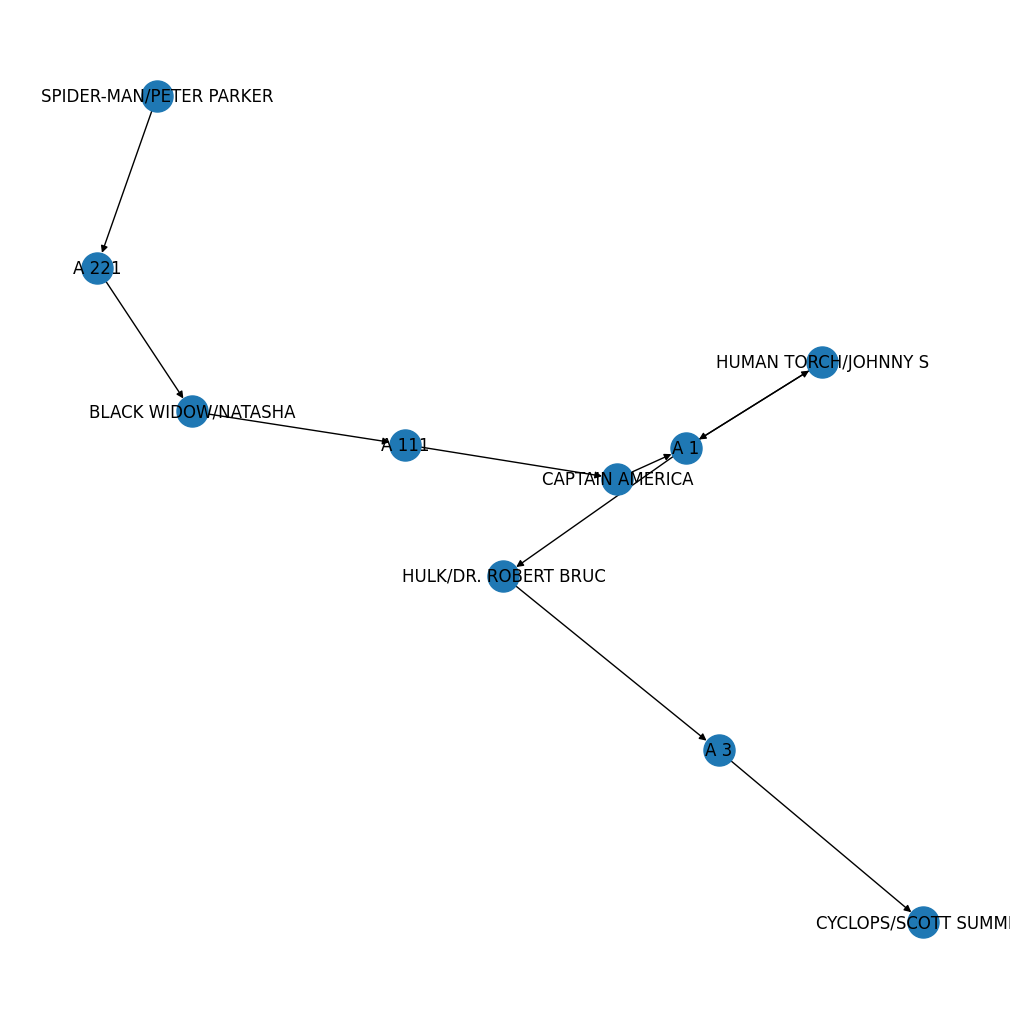

<Figure size 600x600 with 0 Axes>

In [7]:
visualize_shortest_path(g_comics, 42, 'SPIDER-MAN/PETER PARKER', 'CYCLOPS/SCOTT SUMMER', ["BLACK WIDOW/NATASHA",'CAPTAIN AMERICA', 'HUMAN TORCH/JOHNNY S', 'HULK/DR. ROBERT BRUC'], hero_comic = '/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/edges.csv', plot = True)